In [88]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./dataset/dataset_size.csv')

In [3]:
df.head(10)


,Age,ShoulderWidth,ChestWidth,Waist,Hips,TotalHeight,Size
0,30,18,20,14,22,52,M
1,28,22,17,21,25,56,S
2,27,18,16,10,15,53,S
3,29,20,18,19,14,45,S
4,28,14,18,11,30,47,S
5,22,19,18,16,18,60,S
6,18,17,16,12,28,49,S
7,26,15,19,23,27,58,S
8,23,16,20,22,18,40,M
9,31,20,28,91,17,55,L


In [4]:
df.head(10)

,Age,ShoulderWidth,ChestWidth,Waist,Hips,TotalHeight,Size
0,30,18,20,14,22,52,M
1,28,22,17,21,25,56,S
2,27,18,16,10,15,53,S
3,29,20,18,19,14,45,S
4,28,14,18,11,30,47,S
5,22,19,18,16,18,60,S
6,18,17,16,12,28,49,S
7,26,15,19,23,27,58,S
8,23,16,20,22,18,40,M
9,31,20,28,91,17,55,L


In [5]:
def normalize_data(data):
    if pd.notnull(data):
        # data = data.replace(' ', '')  # Remove whitespace from the string
        return round((float(data) * 2.54), 2)
    return None

df["TotalHeight"] = df["TotalHeight"].apply(normalize_data)
df['ShoulderWidth'] = df['ShoulderWidth'].apply(normalize_data)
df['ChestWidth'] = df['ChestWidth'].apply(normalize_data)
df['Waist'] = df['Waist'].apply(normalize_data)
df['Hips'] = df['Hips'].apply(normalize_data)


In [6]:
df.tail(10)

,Age,ShoulderWidth,ChestWidth,Waist,Hips,TotalHeight,Size
706,5,38.10,27.94,58.42,58.42,109.22,S
707,13,20.32,30.48,35.56,73.66,58.42,S
708,2,38.10,20.32,48.26,50.80,81.28,S
709,10,30.48,30.48,35.56,73.66,58.42,S
710,10,30.48,30.48,60.96,66.04,114.30,S
711,13,15.24,35.56,45.72,76.20,149.86,S
712,10,27.94,30.48,5.08,66.04,114.30,S
713,4,43.18,27.94,55.88,55.88,101.60,S
714,13,38.10,35.56,45.72,76.20,149.86,S
715,4,38.10,25.40,50.80,53.34,93.98,S


In [7]:
df.corr()

C:\Users\windows 11\AppData\Local\Temp\ipykernel_21256\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,ShoulderWidth,ChestWidth,Waist,Hips,TotalHeight
Age,1.000000,0.493937,0.290550,0.413718,0.417335,0.507040
ShoulderWidth,0.493937,1.000000,0.368678,0.258733,0.291569,0.436354
ChestWidth,0.290550,0.368678,1.000000,0.303096,0.394100,0.464628
Waist,0.413718,0.258733,0.303096,1.000000,0.696478,0.409002
Hips,0.417335,0.291569,0.394100,0.696478,1.000000,0.430524
TotalHeight,0.507040,0.436354,0.464628,0.409002,0.430524,1.000000


In [8]:
df.columns

Index(['Age', 'ShoulderWidth', 'ChestWidth', 'Waist', 'Hips', 'TotalHeight',
       'Size'],
      dtype='object')

In [9]:
x = df[['Age', 'ShoulderWidth', 'Hips', 'TotalHeight']]
y = df['Size']
print('x.shape', x.shape)
# print('y.shape', y.shape)

x.shape (716, 4)


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=36)

In [11]:
print(x_train.shape)
print(y_train.shape)

(572, 4)
(572,)


## Preprocess Data

In [12]:
df = pd.read_csv('./dataset/dataset_size.csv')


In [13]:
df.head(10)

,Age,ShoulderWidth,ChestWidth,Waist,Hips,TotalHeight,Size
0,30,18,20,14,22,52,M
1,28,22,17,21,25,56,S
2,27,18,16,10,15,53,S
3,29,20,18,19,14,45,S
4,28,14,18,11,30,47,S
5,22,19,18,16,18,60,S
6,18,17,16,12,28,49,S
7,26,15,19,23,27,58,S
8,23,16,20,22,18,40,M
9,31,20,28,91,17,55,L


In [14]:
def normalize_data(data):
    if pd.notnull(data):
        # data = data.replace(' ', '')  # Remove whitespace from the string
        return round((float(data) * 2.54), 2)
    return None

df["TotalHeight"] = df["TotalHeight"].apply(normalize_data)
df['ShoulderWidth'] = df['ShoulderWidth'].apply(normalize_data)
df['ChestWidth'] = df['ChestWidth'].apply(normalize_data)
df['Waist'] = df['Waist'].apply(normalize_data)
df['Hips'] = df['Hips'].apply(normalize_data)


In [15]:
missing_values = df.isnull().sum()
print(missing_values)

Age              0
ShoulderWidth    0
ChestWidth       0
Waist            0
Hips             0
TotalHeight      0
Size             0
dtype: int64


In [16]:
df = df.drop('ChestWidth', axis=1)

In [17]:
df.head(10)

,Age,ShoulderWidth,Waist,Hips,TotalHeight,Size
0,30,45.72,35.56,55.88,132.08,M
1,28,55.88,53.34,63.50,142.24,S
2,27,45.72,25.40,38.10,134.62,S
3,29,50.80,48.26,35.56,114.30,S
4,28,35.56,27.94,76.20,119.38,S
5,22,48.26,40.64,45.72,152.40,S
6,18,43.18,30.48,71.12,124.46,S
7,26,38.10,58.42,68.58,147.32,S
8,23,40.64,55.88,45.72,101.60,M
9,31,50.80,231.14,43.18,139.70,L


In [18]:
df.to_csv("./dataset/normalized_dataset.csv", index=False)

In [19]:
df.head(10)

,Age,ShoulderWidth,Waist,Hips,TotalHeight,Size
0,30,45.72,35.56,55.88,132.08,M
1,28,55.88,53.34,63.50,142.24,S
2,27,45.72,25.40,38.10,134.62,S
3,29,50.80,48.26,35.56,114.30,S
4,28,35.56,27.94,76.20,119.38,S
5,22,48.26,40.64,45.72,152.40,S
6,18,43.18,30.48,71.12,124.46,S
7,26,38.10,58.42,68.58,147.32,S
8,23,40.64,55.88,45.72,101.60,M
9,31,50.80,231.14,43.18,139.70,L


4296

In [21]:
dataframe = pd.read_csv('./dataset/normalized_dataset.csv', skiprows=1)
dataset = dataframe.values

In [22]:
X = dataset[:,:-1].astype(float)
Y = dataset[:,-1]

In [23]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

## Model TF

In [24]:
df = pd.read_csv('./dataset/normalized_dataset.csv')

In [67]:
df.head(10)

,Age,ShoulderWidth,Waist,Hips,TotalHeight,Size
0,30,45.72,35.56,55.88,132.08,M
1,28,55.88,53.34,63.50,142.24,S
2,27,45.72,25.40,38.10,134.62,S
3,29,50.80,48.26,35.56,114.30,S
4,28,35.56,27.94,76.20,119.38,S
5,22,48.26,40.64,45.72,152.40,S
6,18,43.18,30.48,71.12,124.46,S
7,26,38.10,58.42,68.58,147.32,S
8,23,40.64,55.88,45.72,101.60,M
9,31,50.80,231.14,43.18,139.70,L


In [25]:
input_data = df[['Age', 'ShoulderWidth', 'Hips', 'TotalHeight']].values
output_data = df['Size'].values

In [26]:
label_encoder = LabelEncoder()
output_data = label_encoder.fit_transform(output_data)

In [27]:
print(output_data)

[1 2 2 2 2 2 2 2 1 0 2 2 2 2 2 1 2 1 0 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 2 2 2 2 2 2 2 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 0 0 0
 0 0 0 3 0 0 2 0 0 3 3 3 3 2 2 1 1 1 1 1 2 1 1 2 2 2 1 1 0 0 2 0 0 0 0 0 0
 0 0 3 3 3 2 2 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [34]:
print(len(label_encoder.classes_))

4


In [28]:
scaler = StandardScaler()
input_data = scaler.fit_transform(input_data)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [59]:
def create_model(dim,nc):
    model = keras.Sequential()
    model.add(Dense(64, activation='relu', input_shape=(4,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [78]:
model = create_model(4,len(label_encoder.classes_))

In [79]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
18/18 [==============================] - 1s 2ms/step - loss: 0.6177 - accuracy: 0.7972
Epoch 2/20
18/18 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8462
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8654
Epoch 4/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8636
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8654
Epoch 6/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8636
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8724
Epoch 8/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8689
Epoch 9/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8689
Epoch 10/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8759
Epoch 11/20
18/18 [

In [80]:
loss, accuracy = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8750


In [81]:
def pred_size(data):
    data = np.array(data)
    data = np.reshape(data, (1, data.shape[0]))
    pred = model.predict(data)
    predicted_labels = np.argmax(pred, axis=1)
    predicted_sizes = label_encoder.inverse_transform(predicted_labels)
    return predicted_sizes

In [82]:
print(pred_size([30,45.72,55.88,132.08]))

1/1 [==============================] - 0s 80ms/step
['XL']


In [84]:
model.save('model.h5')

In [85]:
loaded_model = tf.keras.models.load_model('model.h5')

# Evaluate the model
accuracy = loaded_model.evaluate(x_test, y_test)

print('Accuracy:', accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8750
Accuracy: [0.3891635537147522, 0.875]


In [87]:
accuracy = history.history['accuracy']
loss = history.history['loss']


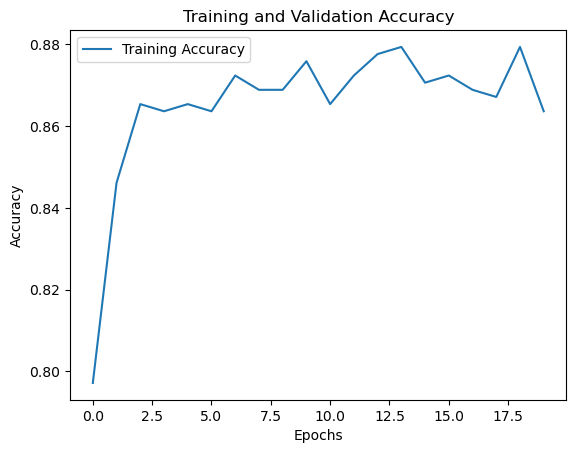

In [89]:
plt.plot(accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

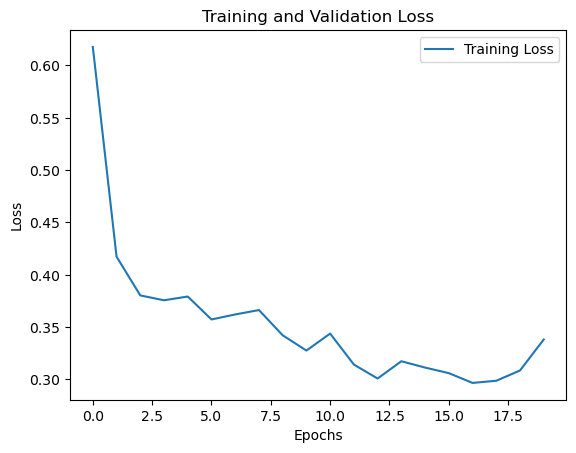

In [90]:
plt.plot(loss, label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
